# Спутная закрутка потока

## requirements

In [ ]:
%pip install --upgrade numpy

In [ ]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/foil.git

In [15]:
from numpy import pi, radians, cos

from foil import Foil

## main

Теплообменные аппараты и системы охлаждения газотурбинных и комбинированных установок. В.Л. Иванов, А.И. Леонтьев, Э.А. Манушин, М.И. Осипов; под ред. А.И. Леонтьева, М, Издательство МГТУ им Н.Э. Баумана, 2004г., 592с. 

![Схема узла подвода охдажающего воздуха к первой ступени турбины авиационного двигателя с предварительной закруткой охлаждающего воздуха](../assets/images/[6_277].png)

![](../assets/images/cooling_lectures_1_19.png)

![](images/cooling_lectures_1_19.png)

In [2]:
class Stator:
    """Статорный лопаточный аппарат"""

    __slots__ = ('angle', )

    def __init__(self, angle: float) -> None:
        self.angle = float(angle)

    def heating(self, parameters: dict, velocity: dict) -> tuple[float, float]:
        """Подогрев"""

        k = parameters.pop('k', None)
        R = parameters.pop('R', None)

        c = velocity.pop('c', None)
        u = velocity.pop('u', None)

        cp = k / (k - 1) * R

        t_u = u**2 / (2*cp)
        t_c_w = (2*c*u*cos(self.angle)-u**2) / (2*cp)

        return float(t_u), float(t_c_w)  # подогрев без закрутки потока, c закруткой потока

In [50]:
R = 287
k = 1.4

c = 300
u = 500

angle = radians(45)

In [51]:
stator = Stator(angle)
stator.heating({'R': R, 'k': k}, {'c': c, 'u': u})

(124.44001991040317, -18.849161594841075)

In [52]:
foil = Foil('BMSTU', discreteness=40, chord=1, installation_angle=angle, step=1,
            name='twisting_stator_foil',
            **{'rotation_angle': angle,
                'relative_inlet_radius': 0.03, 
                'relative_outlet_radius': 0.01, 
                'inlet_angle': radians(15), 
                'outlet_angle': radians(10), 
                'x_ray_cross': 0.4, 
                'upper_proximity': 0.5})

Channel calculation: 100%|██████████| 43/43 [00:00<00:00, 254.76it/s]


<module 'matplotlib.pyplot' from 'c:\\Python\\Python 3.11.9\\Lib\\site-packages\\matplotlib\\pyplot.py'>

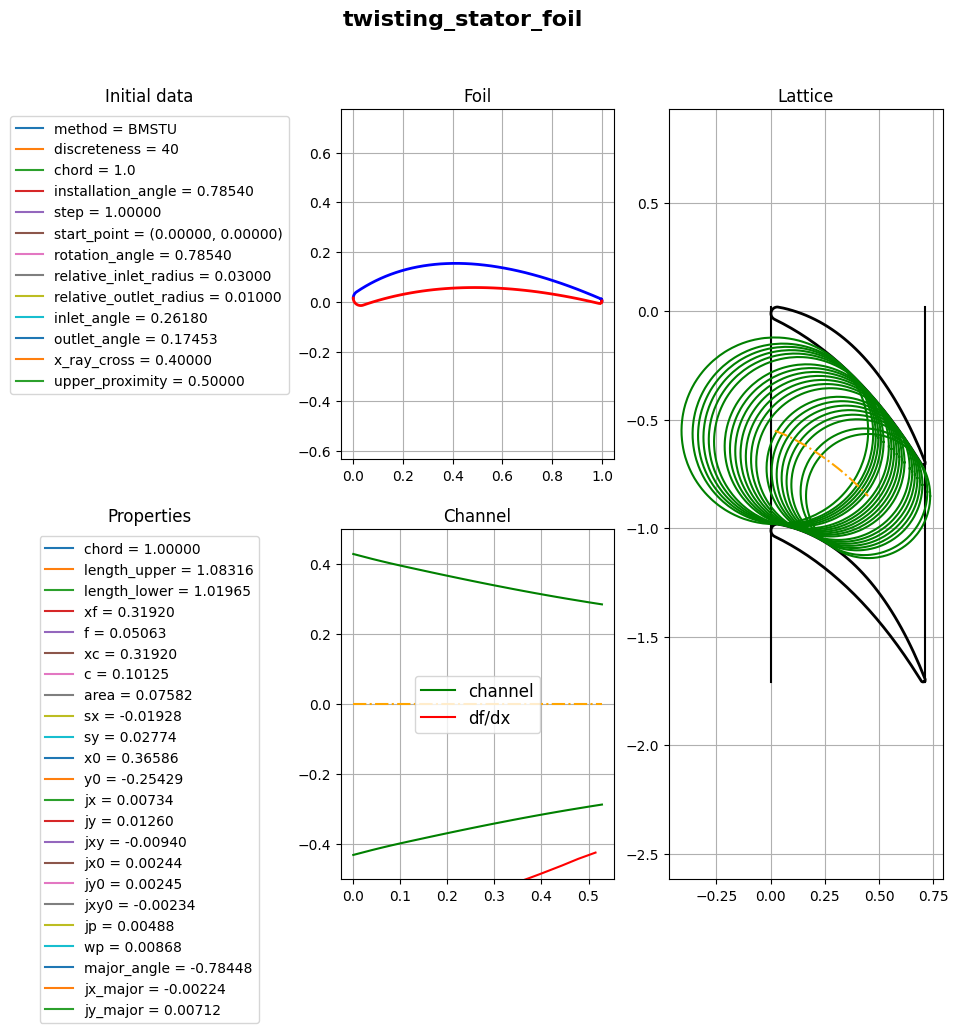

In [53]:
foil.plot()

In [43]:
foil.properties(relative=False)

{'chord': 1.0,
 'length_upper': 1.0708926762093343,
 'length_lower': 1.0253474903331696,
 'xf': np.float64(0.3205),
 'f': np.float64(0.049597671900224766),
 'xc': np.float64(0.3205),
 'c': np.float64(0.09919534380044953),
 'area': 0.07436857754088937,
 'sx': -0.01704175446520651,
 'sy': 0.028307783618183622,
 'x0': 0.38064172469373136,
 'y0': -0.22915262102245543,
 'jx': 0.005892090599912247,
 'jy': 0.01357008361346427,
 'jxy': -0.008757709628487308,
 'jx0': 0.0019869278973890414,
 'jy0': 0.0027949600347819004,
 'jxy0': -0.0022709068170440033,
 'jp': 0.004781887932170941,
 'wp': np.float64(0.008510785557369845),
 'major_angle': np.float64(-0.6973644719958583),
 'jx_major': np.float64(-0.0021514209541961013),
 'jy_major': np.float64(0.006933308886367043)}

In [45]:
foil.to_dataframe()

x         y
0    1.000000  0.002926
1    0.999996  0.003222
2    0.999982  0.003519
3    0.999960  0.003815
4    0.999930  0.004110
..        ...       ...
234  0.999847  0.001184
235  0.999914  0.001616
236  0.999962  0.002051
237  0.999990  0.002488
238  1.000000  0.002926

[239 rows x 2 columns]